In [1]:
import numpy
import tensorflow_datasets as tfds
import numpy as np
import layers
import main
import matplotlib.pyplot as plt
import time
import importlib
ds, info = tfds.load("diamonds", with_info=True, as_supervised=True, split=['train'])
input, output = zip(*list(ds[0]))
input = numpy.array([[item[1].numpy() for item in itemdict.items()]for itemdict in input])
output = numpy.reshape([item.numpy() for item in output],(-1,1))

tsize = len(input) - 20

maxoutput = np.max(output,axis=0,keepdims=True)
testi, testo = input[tsize:], output[tsize:]
output = output / maxoutput
inputdata, outputdata = input[:tsize], output[:tsize]

2024-08-30 21:12:56.641573: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


44.87823796272278
[100907.28942481258, 77974.45847816727, 38131.66765705266, 17348.592236211345, 13032.339054358765, 9700.206611748335, 7612.339735187423, 5378.463779322862, 5193.000318924383, 4958.277344751983, 4089.467419892097, 3792.919012651239, 3578.3792093318934, 3270.4354149415117, 2820.1745168214443, 2342.137173225522, 2168.722219387738, 1964.3932235537175, 1762.4925731684255, 1652.512570791489, 1460.1257073333181, 1330.1106670493032, 1292.8731630527984, 1195.051032395155, 1087.3518022745905, 1015.4090860045853, 945.0494084802727, 882.2912579021698, 821.7715843569641, 771.7838049275272, 733.8027067488752, 689.3197570765445, 656.6217634525634, 627.9706373530149, 583.2087467581113, 549.4281177026999, 529.0229827100967, 500.8492342583061, 473.85171164186136, 451.31567097081955, 432.3603558303413, 416.88665708997235, 396.6906729846561, 382.07408220479425, 372.26334077635806, 359.48660284475375, 350.6026286147052, 342.118831900064, 336.49406495206375, 361.0692130402438, 354.37576234

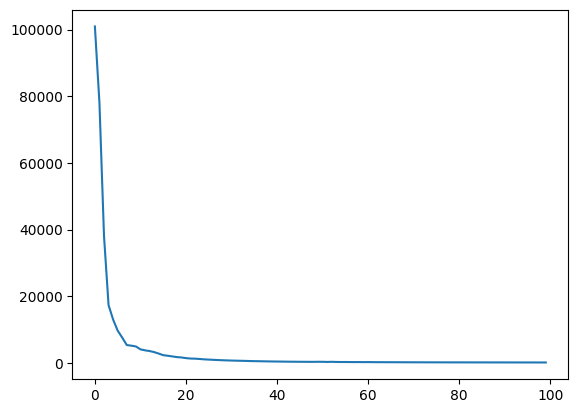

In [9]:
rootl =layers.dense(40, main.layer.LRELU)
currl = rootl
for i in range(5):
    currl = currl.append(layers.dense(40,main.layer.LRELU))

o = currl.append(layers.dense(1,main.layer.LINEAR,normal=None ))

m = main.model(rootl, main.model.MSR,learningRate=.03,optimizer=main.model.ADAM)

start_time = time.time()


costs = m.train(inputdata, outputdata, numIterations=100)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)
print(costs)
plt.plot(costs)